## Transfer Learning VGG 16 and VGG 19 using Keras

In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
#from keras.applications.inception_v3 import InceptionV3
#from keras.applications.Xception import Xception
#from keras.applications.MobileNetV2 import MobileNetV2
from keras.applications.vgg16 import VGG16

from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:


train_path = '/content/drive/MyDrive/Dataset/chest_xray/train'
valid_path = '/content/drive/MyDrive/Dataset/chest_xray/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/chest_xray/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(1, activation='sigmoid')(x)  #len(folders)
# create a model object   
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5302 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 654 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
166/166 [==============================] - 680s 4s/step - loss: 0.1714 - accuracy: 0.9329 - val_loss: 0.3209 - val_accuracy: 0.8914
Epoch 2/10
166/166 [==============================] - 150s 900ms/step - loss: 0.1126 - accuracy: 0.9566 - val_loss: 0.3383 - val_accuracy: 0.8960
Epoch 3/10
166/166 [==============================] - 149s 897ms/step - loss: 0.0928 - accuracy: 0.9649 - val_loss: 0.2484 - val_accuracy: 0.9190
Epoch 4/10
166/166 [==============================] - 147s 885ms/step - loss: 0.0976 - accuracy: 0.9630 - val_loss: 0.3055 - val_accuracy: 0.9083
Epoch 5/10
166/166 [==============================] - 148s 890ms/step - loss: 0.0733 - accuracy: 0.9743 - val_loss: 0.2436 - val_accuracy: 0.9190
Epoch 6/10
166/166 [==============================] - 149s 894ms/step - loss: 0.0709 - accuracy: 0.9742 - val_loss: 0.4337 - val_accuracy: 0.8838
Epoch 7/10
166/166 [==============================] - 151s 906ms/step - loss: 0.0720 - accuracy: 0.9732 - val_loss: 0.5441 - va

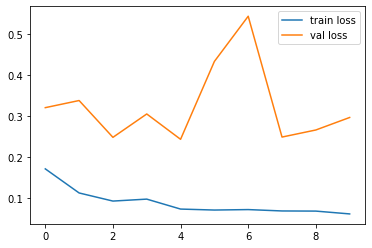

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


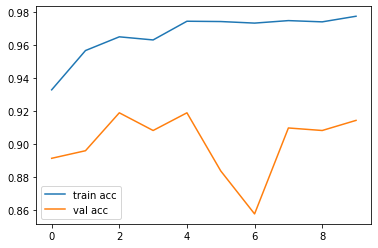

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import os,cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_actual=[]
y_test=[]

In [ ]:
from re import I
from PIL.Image import NORMAL
test_data=[]
test_labels=[]
for i in ['/NORMAL/', '/PNEUMONIA/']:
    for img in (os.listdir('/content/drive/MyDrive/Dataset/chest_xray/test/' +i)):
        img=plt.imread('/content/drive/MyDrive/Dataset/chest_xray/test/'+ i+img)
        img= cv2.resize(img, (224,224))
        img= np.dstack([img, img,img])
        img=img.astype('float32')/ 255
        if i=='/NORMAL/':
          label=0
        elif i=='/PNEUMONIA/':
          label=1
        test_data.append(img)
        test_labels.append(label)

In [ ]:
test_data=np.array(test_data)
test_labels=np.array(test_labels)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
preds= model.predict(test_data)
acc= accuracy_score(test_labels,np.round(preds))*100
cm=confusion_matrix(test_labels,np.round(preds))
tp, fp,fn,tn= cm.ravel()
print("confusion_matrix===========")
print(cm)
print("\ntest_matrix==============")
precision=tp/(tp+fp)
recall=tp/(tp+fn)
sensitivity=tn/(tn+fp)
print('accuracy: {}%'.format(acc))
print('precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-scor: {}%'.format(2*precision*recall/(precision+recall)))

print('\n train matrix===========')
print('train acc:{}'.format(np.round((r.history['accuracy'][-1])*100,2)))


confusion_matrix===========
[[202  40]
 [ 13 399]]

test_matrix==============
accuracy: 91.89602446483181%
precision: 0.8347107438016529%
Recall: 0.9395348837209302%
F1-scor: 0.8840262582056893%

 train matrix===========


AttributeError: ignored

In [ ]:
print("tp=",tp)
print("fn=",fn)
print("tn=",tn)
print("fp=",fp)

tp= 202
fn= 13
tn= 399
fp= 40


In [ ]:
print(classification_report(test_labels,np.round(preds),target_names=['Normal','Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.94      0.83      0.88       242
   Pneumonia       0.91      0.97      0.94       412

    accuracy                           0.92       654
   macro avg       0.92      0.90      0.91       654
weighted avg       0.92      0.92      0.92       654



<Figure size 432x288 with 0 Axes>

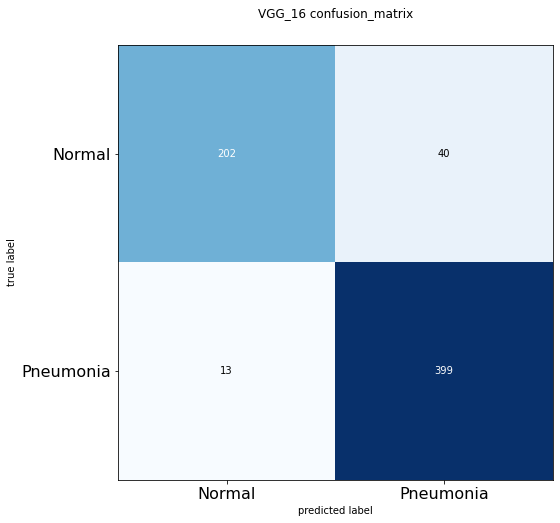

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plt.figure()

plot_confusion_matrix(cm, figsize=(12,8),hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2),['Normal','Pneumonia'],fontsize=16)
plt.yticks(range(2),['Normal','Pneumonia'],fontsize=16)
plt.title("VGG_16 confusion_matrix")

plt.show()


In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
from keras.models import load_model

In [ ]:
from keras.preprocessing import image


In [ ]:
model=load_model('model_vgg16.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x, axis=0)

In [ ]:
img_data=preprocess_input(x)

In [ ]:
classes=model.predict(img_data)
classes

array([[0., 1.]], dtype=float32)

In [ ]:
result=int(classes[0][0])

In [ ]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Person is Affected By PNEUMONIA
